# Geometric Transformations

Let's now understand basic *Geometric Transformation* which are-

- Translate
- Scaling
- Reflection
- Rotation

The basic mathematical equation for transformation is given by:

$P^{*} = \left[T\right].P$

where,
$P^{*}$ is new coordinate vector

$[T]$ is transfomation matrix

$P$ is old coordinate vector

### Importing Libraries

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [93]:
def plot_trans(p, trans, title=None):
    p_poly = Polygon(p[:len(p)-1,:].T, facecolor='k', alpha=0.5)
    trans_poly = Polygon(trans[:len(trans)-1,:].T, facecolor='b', alpha=0.5)
    
    fig, ax = plt.subplots()
    ax.add_patch(p_poly)
    ax.add_patch(trans_poly)
    max_lim = max(np.max(p), np.max(trans)) + 10
    min_lim = min(np.min(p), np.min(trans)) - 10
    ax.set_xlim([min_lim, max_lim])
    ax.set_ylim([min_lim, max_lim])
    ax.set_aspect('equal', adjustable='box')
    ax.grid(True, linestyle="--")
    ax.set_title(title)
    plt.show()

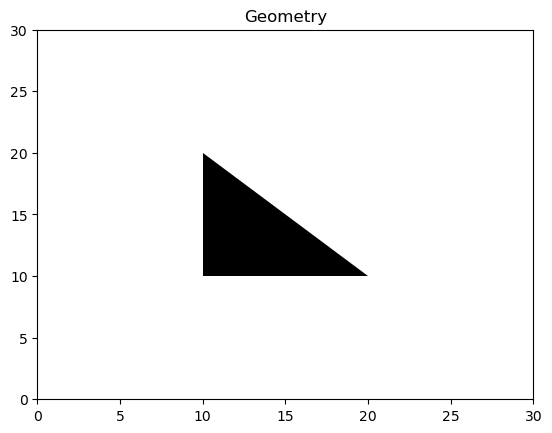

In [94]:
#geometry (Triangle)
p = np.array([[10,10,20],
              [20,10,10],
              [1,1,1]])

#Visualizing
fig,ax = plt.subplots()
ax.add_patch(Polygon(p[:len(p)-1,:].T, facecolor = 'k'))
ax.set_xlim([0,30])
ax.set_ylim([0,30])
ax.set_title("Geometry")
plt.show()

### 1) Translate

This moves geometric entity in new position but parallel to old one.

Mathematically

$\left[P^{*}\right]=$
$
\left[\begin{array}
11&0&x_t\\
0&1&y_t \\
0&0&1
\end{array}\right]
$
$\left\{\begin{array}
xx\\y\\1
\end{array}\right\} $

where $x_t~\&~y_t$ are translation distances.

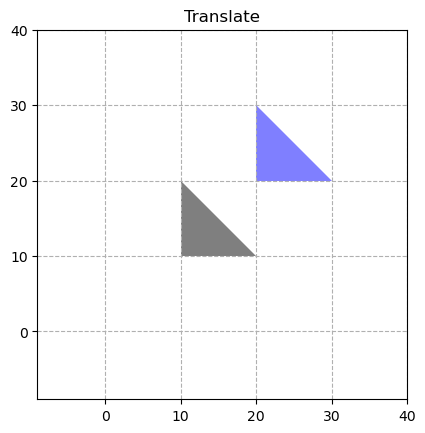

In [95]:
def translate(p,x_t=0,y_t=0):
    
    #translate matrix
    trans = np.array([[1,0,x_t],
                          [0,1,y_t],
                          [0,0,1]])

    #translated geometry
    
    return trans@p

p_trans = translate(p, 10, 10)
plot_trans(p, p_trans,"Translate")

### 2) Scale

This enlarge or shortens the geometric entity.

Mathematically

$\left[P^{*}\right]=$
$
\left[\begin{array}
ss_x&0&0\\
0&s_y&0 \\
0&0&1
\end{array}\right]
$
$\left\{\begin{array}
xx\\y\\1
\end{array}\right\} $

where $sx~\&~sy$ are scaling factors.

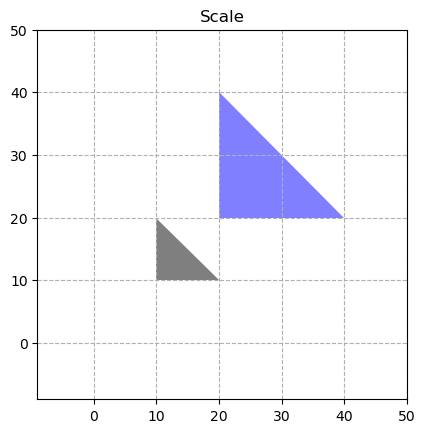

In [96]:
def scale(p,sx=1,sy=1):
    
    #translate matrix
    scale = np.array([[sx,0,0],
                  [0,sy,0],
                  [0,0,1]])

    #translated geometry
    
    return scale@p

p_trans = scale(p, 2, 2)
plot_trans(p, p_trans,"Scale")

### 3) Reflection

A copy of object being reflected along a line.

**a) Reflection along Origin**

Mathematically,

$\left[P^{*}\right]=$
$
\left[\begin{array}
1-1&0&0\\
0&-1&0 \\
0&0&1
\end{array}\right]
$
$\left\{\begin{array}
xx\\y\\1
\end{array}\right\} $

---
**b) Reflection along X axis**

Mathematically,

$\left[P^{*}\right]=$
$
\left[\begin{array}
11&0&0\\
0&-1&0 \\
0&0&1
\end{array}\right]
$
$\left\{\begin{array}
xx\\y\\1
\end{array}\right\} $

---
**c) Reflection along Y axis**

Mathematically,

$\left[P^{*}\right]=$
$
\left[\begin{array}
1-1&0&0\\
0&1&0 \\
0&0&1
\end{array}\right]
$
$\left\{\begin{array}
xx\\y\\1
\end{array}\right\} $

---

**d) Reflection along Y==X**

Mathematically,

$\left[P^{*}\right]=$
$
\left[\begin{array}
00&1&0\\
1&0&0 \\
0&0&1
\end{array}\right]
$
$\left\{\begin{array}
xx\\y\\1
\end{array}\right\} $

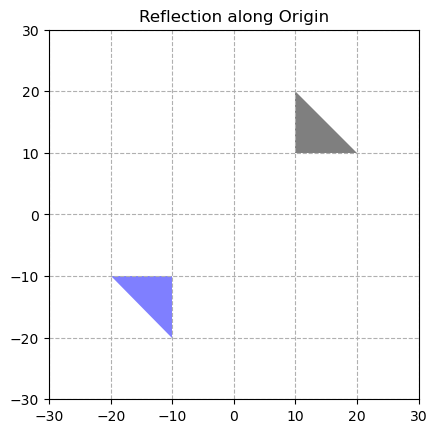

In [97]:
def reflect(p,axis=0):
    
    if axis=="x":
        refle = np.array([[1,0,0],
                        [0,-1,0],
                        [0,0,1]])

    elif axis=="y":
        refle = np.array([[-1,0,0],
                            [0,1,0],
                            [0,0,1]])
    elif axis=="o":
        refle = np.array([[-1,0,0],
                          [0,-1,0],
                          [0,0,1]])
    else:
        refle = np.array([[0,1,0],
                          [1,0,0],
                          [0,0,1]])
    return refle@p

#Origin
p_trans = reflect(p,"o")
plot_trans(p, p_trans,"Reflection along Origin")

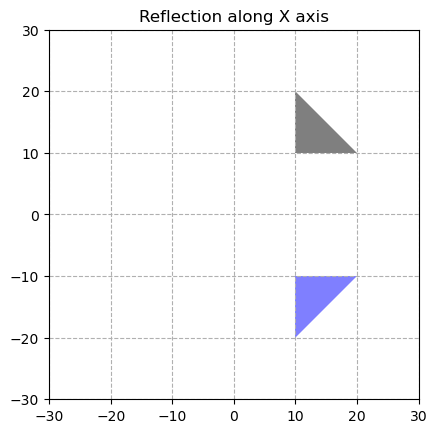

In [98]:
#X
p_trans = reflect(p,"x")
plot_trans(p, p_trans,"Reflection along X axis")

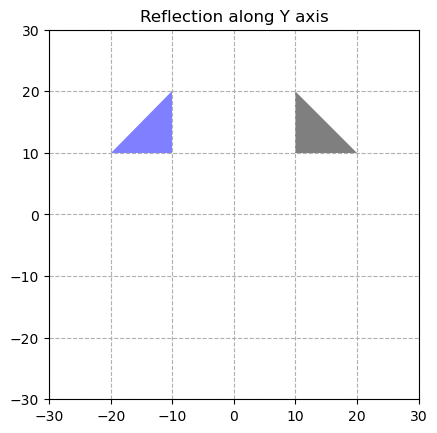

In [99]:
#Y
p_trans = reflect(p,"y")
plot_trans(p, p_trans,"Reflection along Y axis")

### 4) Rotation

Rotation will rotate the geometric entity with given angle $\theta$.

Mathematically

**a) Rotation along Z axis(Anti-clockwise)**

Mathematically,

$\left[P^{*}\right]=$
$
\left[\begin{array}
ccos(\theta)&-sin(\theta)&0\\
sin(\theta)&cos(\theta)&0 \\
0&0&1
\end{array}\right]
$
$\left\{\begin{array}
xx\\y\\1
\end{array}\right\} $

---
**b) Rotation along X axis**

$\left[P^{*}\right]=$
$
\left[\begin{array}
11&0&0\\
0&cos(\theta)&-sin(\theta)\\
0&sin(\theta)&cos(\theta)
\end{array}\right]
$
$\left\{\begin{array}
xx\\y\\1
\end{array}\right\} $

---
**c) Rotation along Y axis**

$\left[P^{*}\right]=$
$
\left[\begin{array}
ccos(\theta)&0&sin(\theta)\\
0&1&0\\
-sin(\theta)&0&cos(\theta)
\end{array}\right]
$
$\left\{\begin{array}
xx\\y\\1
\end{array}\right\} $

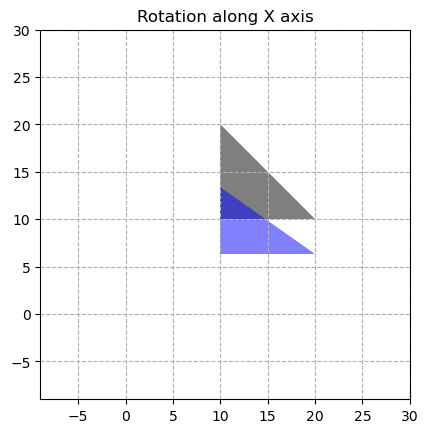

In [106]:
def rotate(p,ax, ang):

    t=ang*(np.pi/180) #angle of rotation (deg)
    
    if ax=="x":
        
        R = np.array([
            [1,0,0],
            [0,np.cos(t),-np.sin(t)],
            [0,np.sin(t),np.cos(t)]])
    
    elif ax=="y":
        R = np.array([
            [np.cos(t),0,np.sin(t)],
            [0,1,0],
            [-np.sin(t),0,np.cos(t)]])
        
    elif ax=="z":
        R = np.array([
                    [np.cos(t),-np.sin(t),0],
                    [np.sin(t),np.cos(t),0],
                    [0,0,1]])
    return R@p
#X
p_trans = rotate(p,"x",45)
plot_trans(p, p_trans,"Rotation along X axis")

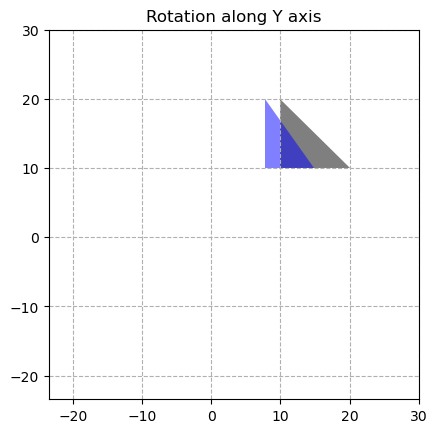

In [107]:
#Y
p_trans = rotate(p,"y",45)
plot_trans(p, p_trans,"Rotation along Y axis")

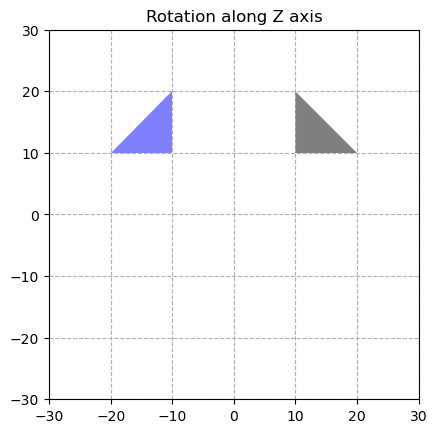

In [109]:
#Z
p_trans = rotate(p,"z",90)
plot_trans(p, p_trans,"Rotation along Z axis")

In this way, geometric entities can we transformed in 2D Frame.